In [1]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function, splits data into training and testing data

In [2]:
data = pd.read_csv("Covid_data_Indian_states.csv")  
data.shape

(484, 4)

In [3]:
reqdata=data.drop(['new_cases','Date'],axis=1)

In [4]:
reqdata.head()

,Week,Weekly_new_infections
0,1.0,3.0
1,2.0,0.0
2,3.0,0.0
3,4.0,0.0
4,5.0,25.0


In [5]:
data.describe()

,new_cases,Week,Weekly_new_infections
count,484.000000,70.000000,7.000000e+01
mean,56932.762397,35.500000,3.936494e+05
std,88418.843773,20.351085,6.150124e+05
min,0.000000,1.000000,0.000000e+00
25%,7298.250000,18.250000,6.149875e+04
50%,24602.000000,35.500000,1.767925e+05
75%,62223.500000,52.750000,4.336235e+05
max,414188.000000,70.000000,2.700989e+06


In [6]:
reqdata.dtypes

Week                     float64
Weekly_new_infections    float64
dtype: object

In [14]:
reqdata.dropna(inplace=True)

In [15]:
np.any(np.isnan(reqdata))

False

In [16]:
np.all(np.isfinite(reqdata))

True

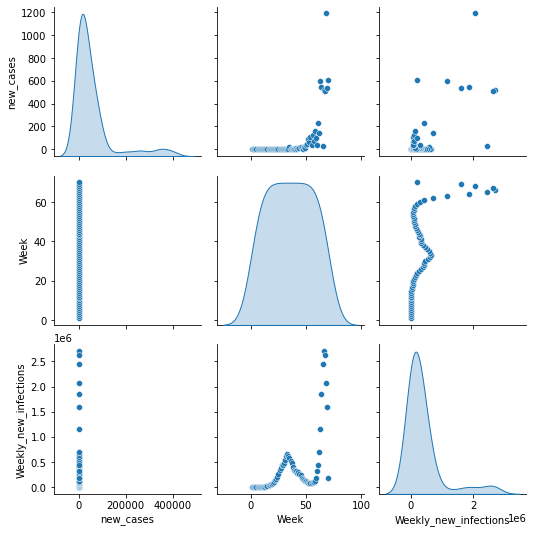

In [17]:
data_attr = data.iloc[:, 0:4] 
sns.pairplot(data, diag_kind='kde')  

In [18]:
X = reqdata.drop(['Weekly_new_infections'], axis=1) #all variables except mpg
# the dependent variable
y = reqdata[['Weekly_new_infections']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [20]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train) 

LinearRegression()

In [21]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[0][idx]))

The coefficient for Week is 17410.704848928614


In [22]:
intercept = reg_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -194677.54086707125


In [23]:
reg_model.score(X_train, y_train)

0.43184884726660744

In [24]:
reg_model.score(X_test, y_test)

0.15468295815443156

In [ ]:
#y=a+bx is the equation of the trendline with a=-194677.54086707125,b=17410.704848928614, where y= Weekly new infections, x=Weeks(Time paramter)